# 4. Visualisierungen von multidimensionalen Daten

Techniken zur Visualisierungen von multidimensionalen Daten können nach [[Keim 2000]](http://kops.uni-konstanz.de/bitstream/handle/123456789/5890/TVCG00.pdf) unterschieden werden nach:
* Geometrische Techniken (z.B. [Scatterplot](https://www.gapminder.org/tools/), [Parallele Koordinaten](http://bl.ocks.org/syntagmatic/raw/3150059/))
* Ikonische Techniken (z.B. [OECD Better Life Index](http://www.oecdbetterlifeindex.org), [Ukko Project](http://project-ukko.net/map.html))
* Pixelbasierte Techniken ([Beispiele](http://kops.uni-konstanz.de/bitstream/handle/123456789/5890/TVCG00.pdf))
* Hierarchische Techniken (z.B. [Dendrogram](https://www.data-to-viz.com/graph/dendrogram.html), [Treemap](https://www.data-to-viz.com/graph/treemap.html), [Sunburst](https://www.data-to-viz.com/graph/sunburst.html))
* Graph-basierte Techniken (z.B. [Node-Link Diagram](https://www.data-to-viz.com/graph/network.html), [Sankey Diagram](https://www.data-to-viz.com/graph/sankey.html), [Heatmap](https://www.data-to-viz.com/graph/heatmap.html), [Arc Diagram](https://www.data-to-viz.com/graph/arc.html))

## Geometrische Visualisierungstechniken

Datenattribute werden auf eine Position im Raum projiziert.

### Import

In [1]:
import pandas as pd
import numpy as np
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
%matplotlib inline

init_notebook_mode(connected=True)
cf.go_offline()

### Beispieldatensätze

#### Gapminder

In [2]:
gm = px.data.gapminder()
gm

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

#### Nutrients

In [3]:
nutr = pd.read_csv("nutrients.csv") #Quelle: http://bl.ocks.org/syntagmatic/raw/3150059/
nutr

name  \
0     Beverage, instant breakfast powder, chocolate,...   
1     Beverage, instant breakfast powder, chocolate,...   
2           Beverage, milkshake mix, dry, not chocolate   
3                                 Butter oil, anhydrous   
4                                        Butter, salted   
...                                                 ...   
7632                      T.G.I. FRIDAY'S, French fries   
7633     T.G.I. FRIDAY'S, Mac & Cheese, from kid's menu   
7634  T.G.I. FRIDAY'S, chicken fingers, from kids' menu   
7635             T.G.I. FRIDAY'S, classic sirloin steak   
7636                  T.G.I. FRIDAY'S, fried mozzarella   

                       group  protein (g)  calcium (g)  sodium (g)  fiber (g)  \
0     Dairy and Egg Products        19.90        0.285       0.385        0.4   
1     Dairy and Egg Products        35.80        0.500       0.717        2.0   
2     Dairy and Egg Products        23.50        0.880       0.780        1.6   
3     Dairy and Egg Products         0.28        0.004       0.002        NaN   
4     Dairy and Egg Products         0.85        0.024       0.714        NaN   
...                      ...          ...          ...         ...        ...   
7632        Restaurant Foods         4.08        0.018       0.374        3.6   
7633        Restaurant Foods         5.84        0.114       0.417        1.0   
7634        Restaurant Foods        21.52        0.038       0.524        0.9   
7635        Restaurant Foods        30.61        0.007       0.194        NaN   
7636        Restaurant Foods        15.73        0.362       0.656        1.9   

      vitaminc (g)  potassium (g)  carbohydrate (g)  sugars (g)  fat (g)  \
0           0.0769          0.947             66.20       65.80     1.40   
1           0.1380          1.705             41.00       39.00     5.10   
2           0.0012          2.200             52.90       51.30     2.60   
3           0.0000          0.005               NaN         NaN    99.48   
4           0.0000          0.024              0.06        0.06    81.11   
...            ...            ...               ...         ...      ...   
7632        0.0000          0.669             37.34        0.32    15.06   
7633        0.0000          0.135             16.42        2.74     4.47   
7634        0.0000          0.335             12.08        0.29    13.91   
7635        0.0000          0.382               NaN         NaN     6.95   
7636        0.0000          0.110             24.55        1.66    19.63   

      water (g)  calories  saturated (g)  monounsat (g)  polyunsat (g)     id  
0          7.40     357.0          0.560          0.314          0.278  27481  
1          7.40     358.0          2.162          1.189          1.027  27482  
2         12.80     329.0          2.059          0.332          0.060  27483  
3          0.24     876.0         61.924         28.732          3.694  27484  
4         15.87     717.0         51.368         21.021          3.043  27485  
...         ...       ...            ...            ...            ...    ...  
7632      41.09     301.0          2.824          4.118          7.502  35113  
7633      71.48     129.0          1.579          1.014          1.323  35114  
7634      49.88     260.0          2.656          3.448          6.874  35115  
7635      61.04     185.0          2.839          2.945          0.551  35116  
7636      37.05     338.0          7.204          5.031          5.328  35117  

[7637 rows x 17 columns]

In [8]:
nutr.fillna(0) #NULL-Werte mit "0" auffüllen

name  \
0     Beverage, instant breakfast powder, chocolate,...   
1     Beverage, instant breakfast powder, chocolate,...   
2           Beverage, milkshake mix, dry, not chocolate   
3                                 Butter oil, anhydrous   
4                                        Butter, salted   
...                                                 ...   
7632                      T.G.I. FRIDAY'S, French fries   
7633     T.G.I. FRIDAY'S, Mac & Cheese, from kid's menu   
7634  T.G.I. FRIDAY'S, chicken fingers, from kids' menu   
7635             T.G.I. FRIDAY'S, classic sirloin steak   
7636                  T.G.I. FRIDAY'S, fried mozzarella   

                       group  protein (g)  calcium (g)  sodium (g)  fiber (g)  \
0     Dairy and Egg Products        19.90        0.285       0.385        0.4   
1     Dairy and Egg Products        35.80        0.500       0.717        2.0   
2     Dairy and Egg Products        23.50        0.880       0.780        1.6   
3     Dairy and Egg Products         0.28        0.004       0.002        0.0   
4     Dairy and Egg Products         0.85        0.024       0.714        0.0   
...                      ...          ...          ...         ...        ...   
7632        Restaurant Foods         4.08        0.018       0.374        3.6   
7633        Restaurant Foods         5.84        0.114       0.417        1.0   
7634        Restaurant Foods        21.52        0.038       0.524        0.9   
7635        Restaurant Foods        30.61        0.007       0.194        0.0   
7636        Restaurant Foods        15.73        0.362       0.656        1.9   

      vitaminc (g)  potassium (g)  carbohydrate (g)  sugars (g)  fat (g)  \
0           0.0769          0.947             66.20       65.80     1.40   
1           0.1380          1.705             41.00       39.00     5.10   
2           0.0012          2.200             52.90       51.30     2.60   
3           0.0000          0.005              0.00        0.00    99.48   
4           0.0000          0.024              0.06        0.06    81.11   
...            ...            ...               ...         ...      ...   
7632        0.0000          0.669             37.34        0.32    15.06   
7633        0.0000          0.135             16.42        2.74     4.47   
7634        0.0000          0.335             12.08        0.29    13.91   
7635        0.0000          0.382              0.00        0.00     6.95   
7636        0.0000          0.110             24.55        1.66    19.63   

      water (g)  calories  saturated (g)  monounsat (g)  polyunsat (g)     id  
0          7.40     357.0          0.560          0.314          0.278  27481  
1          7.40     358.0          2.162          1.189          1.027  27482  
2         12.80     329.0          2.059          0.332          0.060  27483  
3          0.24     876.0         61.924         28.732          3.694  27484  
4         15.87     717.0         51.368         21.021          3.043  27485  
...         ...       ...            ...            ...            ...    ...  
7632      41.09     301.0          2.824          4.118          7.502  35113  
7633      71.48     129.0          1.579          1.014          1.323  35114  
7634      49.88     260.0          2.656          3.448          6.874  35115  
7635      61.04     185.0          2.839          2.945          0.551  35116  
7636      37.05     338.0          7.204          5.031          5.328  35117  

[7637 rows x 17 columns]

### Scatterplots

Scatterplots sind zwar in der Lage multidimensionale Datensätze darzustellen, durch die Position können jedoch nur 2-3 Dimensionen im Kartesischen Koordinatensystem kodiert werden. Durch die Nutzung von visuellen Variablen wie Form, Farbe und Größe können die dargestellten Dimensionen leicht erhöht werden.

---

**WAS:** multidimensionale Daten, vor allem quantitative Attribute, auch kategorische

**WARUM:** Korrelation und Verteilungen erkennen

In [11]:
fig = px.scatter(gm.query("year==2007"), x="gdpPercap", y="lifeExp")
fig.show()

Darstellung von mehr als zwei Attributen durch die Nutzung weiterer visueller Attribute möglich (z.B. Farbe (color), Größe (size), Form (symbol))

In [12]:
fig = px.scatter(gm.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent", size_max=50)
fig.show()

Weitere Anpassungen: Animation und Hover hinzufügen, Skala ändern:

In [13]:
fig = px.scatter(gm, x="gdpPercap", y="lifeExp", size="pop", color="continent", animation_frame="year", 
                 hover_name="country", log_x=True, size_max=50)
fig.show()

Weitere Beispiele: https://plotly.com/python/line-and-scatter/ + [Plotly Express in Python](https://plotly.com/python/plotly-express/)

### 3D Scatterplot

Limitiert auf die Darstellung von 3 Dimensionen + visuelle Variablen (Farbe, Form, ....).

In [35]:
fig = px.scatter_3d(gm.query("year==2007"), x="gdpPercap", y="lifeExp", z="pop", color="continent", size="pop", 
                    hover_name="country", size_max=50)
fig.show()

### Parallele Koordinaten

Definieren einen Raum, der durch eine beliebige Anzahl parallel angeordneter Achsen aufgespannt wird [[Inselberg 2009]](https://www.springer.com/de/book/9780387215075). Jede Achse repräsentiert dabei eine Dimension der multidimensionalen Daten. Ein Datum wird durch eine einzelne Linie repräsentiert, welche die Achse an der entsprechenden Stelle schneidet. Durch die verschiedenen Linien ergeben sich Muster, die Korrelationen im Datensatz sichtbar machen: wenn zwei Nachbarachsen eine hohe positive Korrelation haben, sind die Liniensegmente meist parallel zueinander, bei einer negativen Korrelation schneiden sich die Liniensegmente in einem Punkt zwischen den Achsen.

---

**WAS:** multidimensionale Daten, quantitative Attribute

**WARUM:** Korrelation und Verteilungen erkennen

In [19]:
fig = px.parallel_coordinates(gm, color="gdpPercap", labels={"year":"Jahr","lifeExp": "Lebenserwartung",
                 "pop" : "Population", "gdpPercap": "Einkommen", "iso_num" : "ISO", },
                    color_continuous_scale=px.colors.sequential.Viridis, color_continuous_midpoint=2)
fig.show()

In [16]:
nutr_oID = nutr.drop(columns='id') #id Spalte löschen
nutr_oID.head()


name                   group  \
0  Beverage, instant breakfast powder, chocolate,...  Dairy and Egg Products   
1  Beverage, instant breakfast powder, chocolate,...  Dairy and Egg Products   
2        Beverage, milkshake mix, dry, not chocolate  Dairy and Egg Products   
3                              Butter oil, anhydrous  Dairy and Egg Products   
4                                     Butter, salted  Dairy and Egg Products   

   protein (g)  calcium (g)  sodium (g)  fiber (g)  vitaminc (g)  \
0        19.90        0.285       0.385        0.4        0.0769   
1        35.80        0.500       0.717        2.0        0.1380   
2        23.50        0.880       0.780        1.6        0.0012   
3         0.28        0.004       0.002        NaN        0.0000   
4         0.85        0.024       0.714        NaN        0.0000   

   potassium (g)  carbohydrate (g)  sugars (g)  fat (g)  water (g)  calories  \
0          0.947             66.20       65.80     1.40       7.40     357.0   
1          1.705             41.00       39.00     5.10       7.40     358.0   
2          2.200             52.90       51.30     2.60      12.80     329.0   
3          0.005               NaN         NaN    99.48       0.24     876.0   
4          0.024              0.06        0.06    81.11      15.87     717.0   

   saturated (g)  monounsat (g)  polyunsat (g)  
0          0.560          0.314          0.278  
1          2.162          1.189          1.027  
2          2.059          0.332          0.060  
3         61.924         28.732          3.694  
4         51.368         21.021          3.043

In [17]:
fig = px.parallel_coordinates(nutr_oID, color="calories", labels= nutr_oID.columns,
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

Weite Möglichkeiten um Farbskalen ändern: https://plotly.com/python/builtin-colorscales/, https://plotly.com/python/colorscales/

### Parallel Sets

Parallel Sets nutzen ebenfalls parallele Achsen wie Parallele Koordinaten. Die einzelnen Datenwerte werden jedoch nicht als einzelne Linien dargestellt sondern aggregiert. Dadurch wird die Häufigkeitsverteilung repräsentiert.

---

**WAS:** multidimensionale Daten, kategorische Attribute

**WARUM:** Korrelation und Verteilungen erkennen

In [20]:
df = px.data.tips()
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [21]:
fig = px.parallel_categories(df, color="size", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

### Dimensionsreduktion

Bei hochdimensionalen Datensätzen können auch Parallele Koordinaten an ihre Grenzen kommen. Hier kann die Dimensionsreduktion eingesetzt werden wie Multidimensional Scaling, Hauptkomponentenanalyse (PCA), tSNE oder UMAP.
Dabei wird der hochdimensionale Datenraum in einen niedrigdimensionalen Datenraum (meistens 2 oder 3 Dimensionen) reduziert. Jedoch bringt die Dimensionsreduktion (DR) ein Informationsverlust mit sich. Der resultierende DR-Plot erlaubt die Analyse der Ähnlichkeiten im hochdimensionalen Raum, aber nicht mehr die Analyse der einzelnen Eigenschaften.

---

**WAS:** hochdimensionale Daten, quantitative Attribute

**WARUM:** Ähnlichkeiten erkennen

In [22]:
#nutr.head()
nutrQnt = nutr.iloc[:,2:-1]
nutr2 = nutrQnt.fillna(0)
nutr2.head()

protein (g)  calcium (g)  sodium (g)  fiber (g)  vitaminc (g)  \
0        19.90        0.285       0.385        0.4        0.0769   
1        35.80        0.500       0.717        2.0        0.1380   
2        23.50        0.880       0.780        1.6        0.0012   
3         0.28        0.004       0.002        0.0        0.0000   
4         0.85        0.024       0.714        0.0        0.0000   

   potassium (g)  carbohydrate (g)  sugars (g)  fat (g)  water (g)  calories  \
0          0.947             66.20       65.80     1.40       7.40     357.0   
1          1.705             41.00       39.00     5.10       7.40     358.0   
2          2.200             52.90       51.30     2.60      12.80     329.0   
3          0.005              0.00        0.00    99.48       0.24     876.0   
4          0.024              0.06        0.06    81.11      15.87     717.0   

   saturated (g)  monounsat (g)  polyunsat (g)  
0          0.560          0.314          0.278  
1          2.162          1.189          1.027  
2          2.059          0.332          0.060  
3         61.924         28.732          3.694  
4         51.368         21.021          3.043

**UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction**

Link: https://umap-learn.readthedocs.io/en/latest/

Installation: `conda install -c conda-forge umap-learn` bzw. `pip install umap-learn`

In [23]:
import umap

In [24]:
reducer = umap.UMAP()

drPlot = reducer.fit_transform(nutr2)
drPlot.shape

(7637, 2)

In [25]:
import matplotlib.pyplot as plt

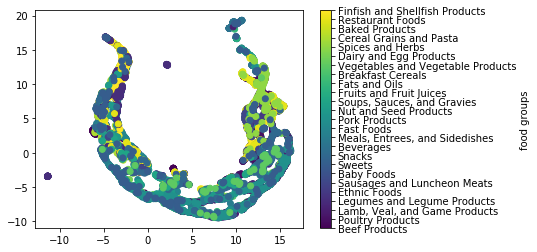

In [27]:
#plot = plt.scatter(drPlot[:,0], drPlot[:,1])

groups = nutr["group"].astype('category').cat.codes
categories = pd.DataFrame([groups.unique(), nutr["group"].astype('category').cat.categories.unique()]).transpose()
plot = plt.scatter(drPlot[:,0], drPlot[:,1], c=groups)
plot = plt.colorbar(label='food groups', ticks=categories[0].tolist()).ax.set_yticklabels(categories[1].tolist())

**Darstellung in Plotly**

Anstelle von Scatter() kann auch Scattergl() verwendet werden für große Datensätze.
Die WebGL Variante ermöglicht mehr Daten zu plotten und verbessert die Geschwindigkeit und Interaktivität in großen Datenmengen.

https://plotly.com/python/line-and-scatter/

In [28]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergl(
    x = drPlot[:,0],
    y = drPlot[:,1],
    text= "Name:"+ nutr["name"] + " Gruppe:"+ nutr["group"],
    hovertemplate="%{text}",
    mode='markers',
    marker=dict(
        color=groups,
        colorscale='Viridis',
        line_width=1
    )
))

fig.show()

**Anwendung anderer DR-Algorithmen**

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

In [29]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA().fit_transform(nutr2)

In [32]:
fig = go.Figure(data=go.Scattergl(
    x = pca[:,0],
    y = pca[:,1],
    text= "Name:"+ nutr["name"] + " Gruppe:"+ nutr["group"],
    hovertemplate="%{text}",
    mode='markers',
    marker=dict(
        color=groups,
        colorscale='Viridis',
        line_width=1
    )
))

fig.show()

## Hierarchische Techniken

Hierarchische Daten werden oft in DataFrames gespeichert, bei denen die verschiedenen Spalten den verschiedenen Ebenen der Hierarchie entsprechen.

### Treemap
Verschachtelte hierarchische Technik

https://plotly.com/python/treemaps/

---

**WAS:** hierarchische Daten mit verschachtelten kategorischen Attributen, Farbe und Größe kann für quantitative Attribute genutzt werden

**WARUM:** hierarchische Relationen analysieren

In [33]:
df = px.data.tips()
fig = px.treemap(df, path=['sex', 'day', 'time'], values='tip', color='total_bill')
#fig = px.treemap(df, path=['day', 'time', 'sex'], values='tip', color='total_bill')
#Reihenfolge kann im Pfad ausgetauscht werden
fig.show()

### Sunburst

Radiale, gestapelte Technik

https://plotly.com/python/sunburst-charts/

In [34]:
fig = px.sunburst(df, path=['day', 'time', 'sex'], values='tip', color='total_bill')
fig.show()